In [2]:
import matplotlib.pyplot as mpl
import numpy as np
from   numpy import exp,cos,sin,pi,tan,sqrt,angle,absolute,eye,dot
from __future__ import division

In [3]:
##### Settings and parameters
wid=0.5 # of tuning curve
ampl=1.0
sigma=0.2 # noise level

N=100 # number of neurons, equally spaced -pi..pi. For dense coding one needs: 2Pi/N << wid
M=100 # number of bins used for discretized prob dist = number of candidate estimates
K=100 # number of stimuli where bias is calculated (used for plotting, but also for bias derivative)

##############################
par = [ampl,wid,0]
# A: set of preferred orientations of the neurons
A = np.linspace(-pi,pi,N+1)[:-1]
 
# As: set of candidate estimates
# at low noise this can be a narrow region around true value.
# should build a warning when std.dev. < ds, or when it exceeds range
As = np.linspace(0,pi,M+1)[:-1]

# stimuli for which bias and var is calculated and plotted. Does not need to cover full 0..pi
thetas = np.linspace(0,pi/2,K)

In [4]:
def fun_2d_sum(x_,s1,s2,par):
    return par[0]*(exp(-(s1-x_)**2/(2*par[1]**2))+exp(-(s2-x_)**2/(2*par[1]**2)))
                   
def fun_th_sum(x_,th,par):               
    return fun_2d_sum(x_,th/2,-th/2,par) #set eta=0

fun = fun_th_sum

## Limited range correlations

In [55]:
# Correlation parameters
c0 = 1.0 # Max correlation
l = 0.5  # Correlation length

pref_ang_dists = A - A[:,None] # (N,N)
pref_ang_dists = absolute(angle(exp(1j * pref_ang_dists))) # in range [0,pi]

# Correlation matrix
R = c0*(exp(-pref_ang_dists / l) - eye(N)) + eye(N)

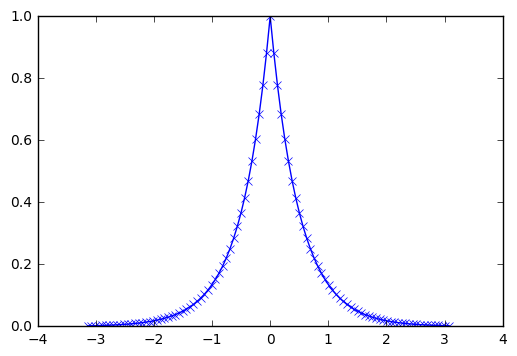

In [56]:
# correlations visualisations

mpl.plot(A, R[50], '-x')
mpl.show()

In [52]:
# Matrix of standard deviations (uniform variance assumed)
S = sigma * eye(N)

# Covariance matrix, Q=SRS
Q = dot(S, dot(R,S))

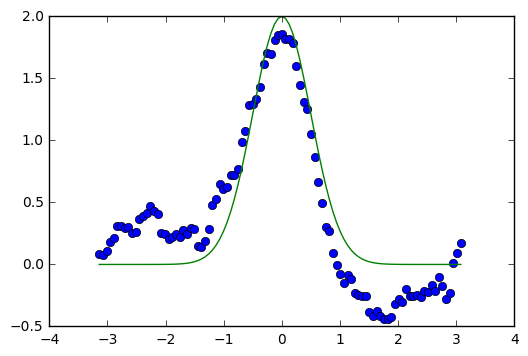

In [54]:
# sample population response
stim = 0.0
f = fun(A,stim,par)
pop_res = np.random.multivariate_normal(f, Q)
mpl.plot(A, pop_res, 'o')
mpl.plot(A, f)
mpl.show()

In [181]:
# # trying to formulate negative log likelihood expression

# F = fun(A,As[:,None],par)

# stim = 0.0
# f = fun(A,stim,par)
# r = np.random.multivariate_normal(f, Q, nreals)

# tmp = np.tensordot( (r-F[:,None]), np.linalg.inv(Q), axes=1 )
# tmp2 = np.einsum('ijk,ijk->ij', tmp, (r-F[:,None]))

In [38]:
def get_ML_ests(stims,nreals=1000):
    # number of realizations
    # set stimulus index (such that the stimulus value is As[stim])
    # find all possible responses across sample stimuli
    
    nth=len(thetas)
    biasML=np.zeros(nth)
    varML = np.zeros(nth)
    sol=np.zeros((nth,nreals))
    for ith in range(nth):
        stim=thetas[ith]
        
        F = fun(A,As[:,None],par)
        # find real response and add noise
        f = fun(A,stim,par)
        r = np.random.multivariate_normal(f, Q, nreals)
        
        # find total squared errors across possible stimuli
        tmp = np.tensordot( (r-F[:,None]), np.linalg.inv(Q), axes=1 )
        neg_log_lik = np.einsum('ijk,ijk->ij', tmp, (r-F[:,None]))
        
        # find the minimum error stimuli for each noise realization, ML
        sol[ith,:] = As[neg_log_lik.argmin(axis=0)]
        biasML[ith]= sol[ith,:].mean()-stim
        varML[ith] = ((sol[ith,:] - sol[ith,:].mean())**2).mean()

    # plot decoding distribution histogram
    #dA = (As[1]-As[0])/2
    #freq, edges = np.histogram(sol, bins=As-dA)
    #hv.Histogram(freq/freq.sum(),edges)
    # return list of biases and sol: nstim X nreals
    return [biasML,sol,varML]

c0 = 1.0

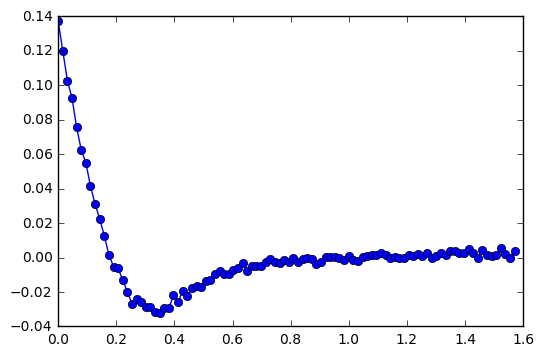

In [10]:
[biasML,sol,varML]=get_ML_ests(thetas,nreals=5000)
mpl.plot(thetas,biasML,'-o')
mpl.show()

In [13]:
biasML_c10 = biasML
sol_c10 = sol
varML_c10 = varML

c0 = 0.8

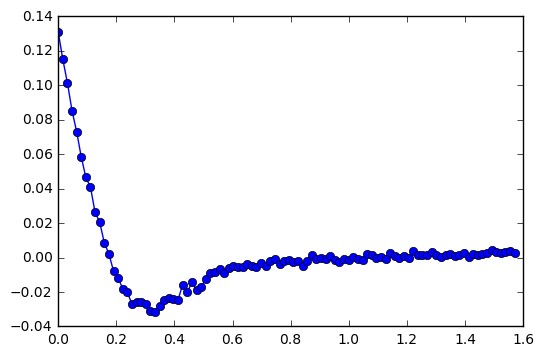

In [19]:
[biasML,sol,varML]=get_ML_ests(thetas,nreals=5000)
mpl.plot(thetas,biasML,'-o')
mpl.show()

In [26]:
biasML_c08 = biasML
sol_c08 = sol
varML_c08 = varML

c = 0.6

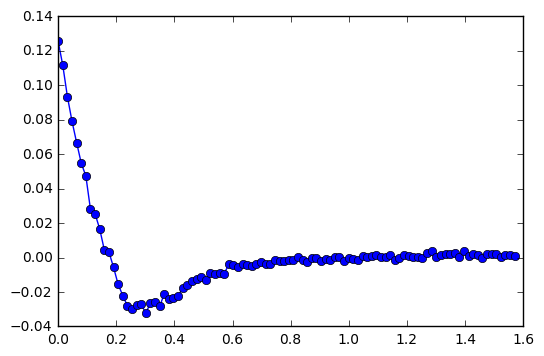

In [27]:
[biasML,sol,varML]=get_ML_ests(thetas,nreals=5000)
mpl.plot(thetas,biasML,'-o')
mpl.show()

In [28]:
biasML_c06 = biasML
sol_c06 = sol
varML_c06 = varML

c0 = 0.0 i.e. independent neurons

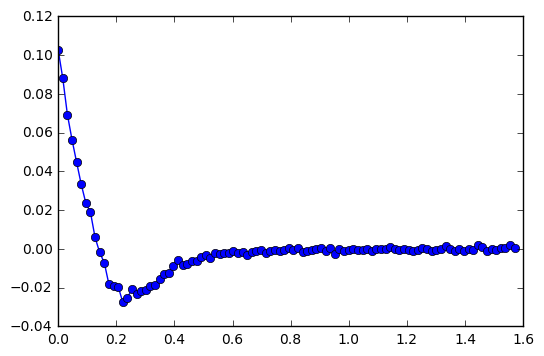

In [39]:
[biasML,sol,varML]=get_ML_ests(thetas,nreals=5000)
mpl.plot(thetas,biasML,'-o')
mpl.show()

In [40]:
biasML_c00 = biasML
sol_c00 = sol
varML_c00 = varML

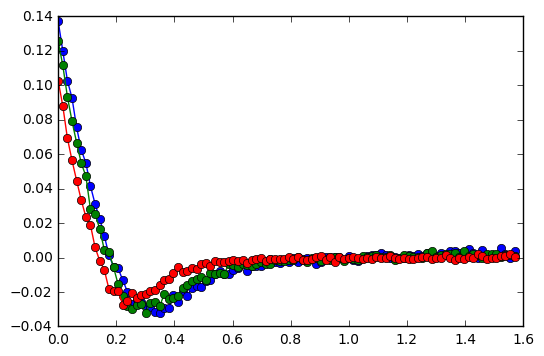

In [43]:
mpl.plot(thetas,biasML_c10,'-o')
# mpl.plot(thetas,biasML_c08,'-o')
mpl.plot(thetas,biasML_c06,'-o')
mpl.plot(thetas,biasML_c00,'-o')
mpl.show()

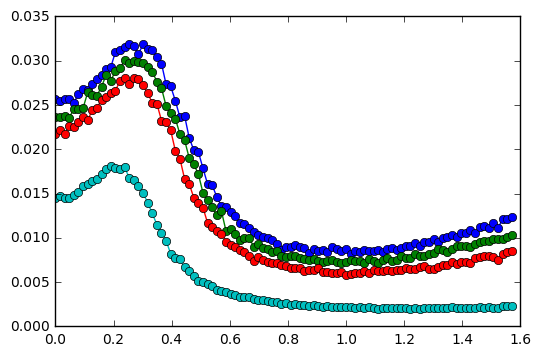

In [47]:
mpl.plot(thetas,varML_c10,'-o')
mpl.plot(thetas,varML_c08,'-o')
mpl.plot(thetas,varML_c06,'-o')
mpl.plot(thetas,varML_c00,'-o')
mpl.show()